# Machine Learning with Decision Trees and Random Forests

We will be exploring publicly available data from LendingClub.com. Lending Club is a service that connects borrowers with people who have money (investors). We will try to create a model that will help predict if a person has a high probability of paying the loan back.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('C://Users//PC//ML Portfolio//data//loan_data.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Data

We will use lending data from 2007-2010 and try to classify and predict whether or not the borrower paid back their loan in full. 

The data set contains the following features:

* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [9]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


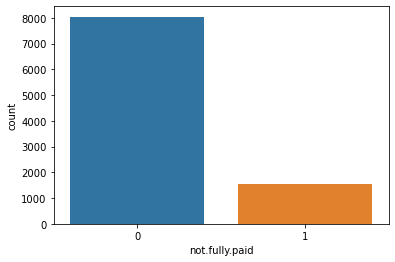

In [29]:
sns.countplot(data=df,x='not.fully.paid');

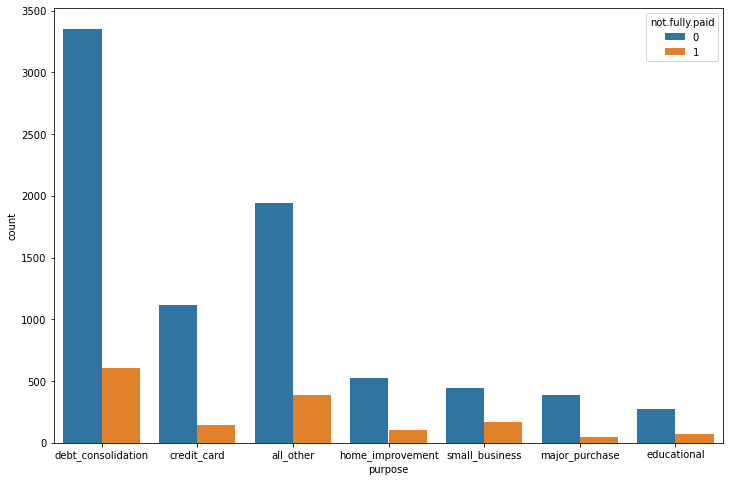

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='purpose',hue='not.fully.paid');

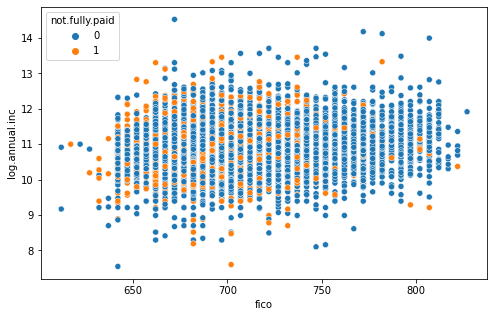

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='fico',y='log.annual.inc',hue='not.fully.paid');

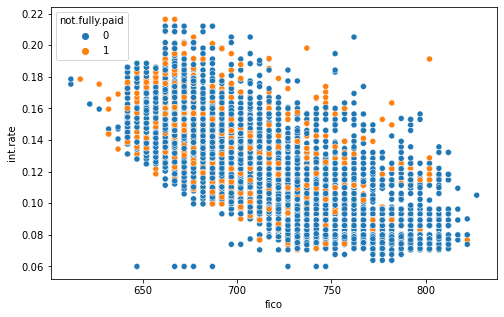

In [44]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='fico',y='int.rate',hue='not.fully.paid');

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


<AxesSubplot:>

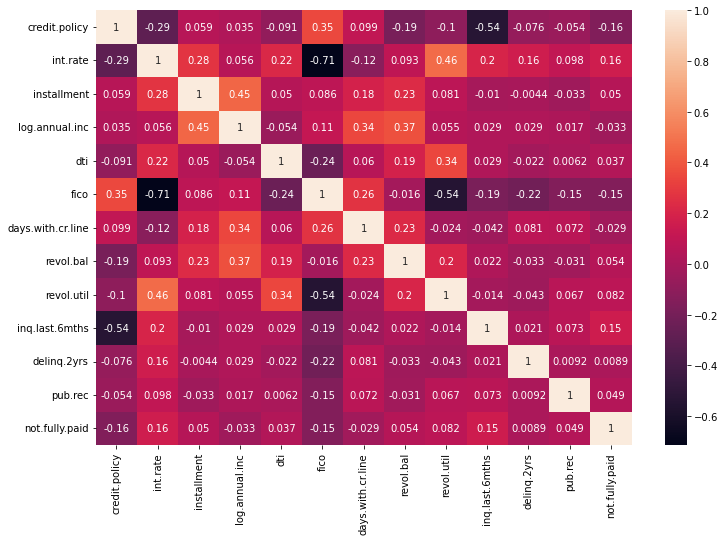

In [72]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

## Model Building

The _purpose_ column is categorical.

That means we need to transform them using dummy variables so sklearn will be able to understand them. 

In [48]:
X = pd.get_dummies(df.drop('not.fully.paid',axis=1))

In [50]:
y = df['not.fully.paid']

### Train Test Split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Model Training - Random forest

No feature scaling needed as this is decision tree based model

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc = RandomForestClassifier(class_weight='balanced')

In [62]:
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

### Predictions and Evaluation of Random forest classifier

In [63]:
y_preds = rfc.predict(X_test)

In [67]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

In [65]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.01      0.02       443

    accuracy                           0.85      2874
   macro avg       0.67      0.50      0.47      2874
weighted avg       0.79      0.85      0.78      2874



In [66]:
confusion_matrix(y_test,y_preds)

array([[2427,    4],
       [ 439,    4]], dtype=int64)

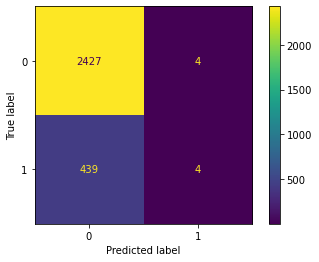

In [68]:
plot_confusion_matrix(rfc,X_test,y_test)

Terrible F1 score. This model should not be used.

### Model Training - Decision Tree

No feature scaling needed as this is decision tree based model

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
tree = DecisionTreeClassifier(random_state=101)

In [86]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

### Predictions and Evaluation of Decision tree classifier

In [87]:
tree_preds = tree.predict(X_test)

In [88]:
print(classification_report(y_test,tree_preds))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2431
           1       0.19      0.24      0.21       443

    accuracy                           0.72      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.72      0.73      2874



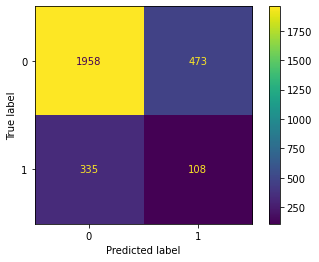

In [89]:
plot_confusion_matrix(tree,X_test,y_test)

IMO, performing better than Random forest classifier as F1 score is higher but still low. Predicting 335 out of 443 people will not pay when they will.

Model is also unable to predict very well as there are no distinct features that can really help to identify if a person will pay back or not. This can be corroborated through the scatter plot when we classify the hue and you can see there are no distinct seperation between the two.